In [2]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import datetime as dt
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import seaborn as sns
import sklearn
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\Josh Bond\Anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# Import and Clean Data

In [3]:
# import the cleaned HPI csv data and assign to a dataframe with date as index
csv = Path("clean_data/top20_hpi_monthly_full.csv")
df = pd.read_csv(csv)
df.head()

,MSA,Year,HPI
0,"Baltimore-Columbia-Towson, MD",1975-01-31,26.81
1,"Baltimore-Columbia-Towson, MD",1975-02-28,26.79
2,"Baltimore-Columbia-Towson, MD",1975-03-31,26.77
3,"Baltimore-Columbia-Towson, MD",1975-04-30,26.78
4,"Baltimore-Columbia-Towson, MD",1975-05-31,26.85


In [4]:
# convert year column into datetime format
df['Year'] = pd.to_datetime(df['Year'])
df.head()

,MSA,Year,HPI
0,"Baltimore-Columbia-Towson, MD",1975-01-31,26.81
1,"Baltimore-Columbia-Towson, MD",1975-02-28,26.79
2,"Baltimore-Columbia-Towson, MD",1975-03-31,26.77
3,"Baltimore-Columbia-Towson, MD",1975-04-30,26.78
4,"Baltimore-Columbia-Towson, MD",1975-05-31,26.85


In [5]:
# set index as date column
df.index = df['Year']
df.drop(columns='Year')

,MSA,HPI
Year,,
1975-01-31,"Baltimore-Columbia-Towson, MD",26.81
1975-02-28,"Baltimore-Columbia-Towson, MD",26.79
1975-03-31,"Baltimore-Columbia-Towson, MD",26.77
1975-04-30,"Baltimore-Columbia-Towson, MD",26.78
1975-05-31,"Baltimore-Columbia-Towson, MD",26.85
1975-06-30,"Baltimore-Columbia-Towson, MD",27.03
1975-07-31,"Baltimore-Columbia-Towson, MD",27.27
1975-08-31,"Baltimore-Columbia-Towson, MD",27.51
1975-09-30,"Baltimore-Columbia-Towson, MD",27.70


In [6]:
# check for nulls in data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11040 entries, 1975-01-31 to 2020-12-31
Data columns (total 3 columns):
MSA     11040 non-null object
Year    11040 non-null datetime64[ns]
HPI     11040 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 345.0+ KB


# Splice Data for Top 5 MSA

In [7]:
# New York
df_ny = df.loc[df['MSA']== "New York-Newark-Jersey City, NY-NJ-PA"]
df_ny.drop(columns='Year',inplace=True)
df_ny.head()

,MSA,HPI
Year,,
1975-01-31,"New York-Newark-Jersey City, NY-NJ-PA",20.25
1975-02-28,"New York-Newark-Jersey City, NY-NJ-PA",19.81
1975-03-31,"New York-Newark-Jersey City, NY-NJ-PA",19.57
1975-04-30,"New York-Newark-Jersey City, NY-NJ-PA",19.55
1975-05-31,"New York-Newark-Jersey City, NY-NJ-PA",19.64


In [8]:
# Los Angeles
df_la = df.loc[df['MSA']== "Los Angeles-Long Beach-Anaheim, CA"]
df_la.drop(columns='Year',inplace=True)
df_la.head()

,MSA,HPI
Year,,
1975-01-31,"Los Angeles-Long Beach-Anaheim, CA",15.76
1975-02-28,"Los Angeles-Long Beach-Anaheim, CA",15.89
1975-03-31,"Los Angeles-Long Beach-Anaheim, CA",16.16
1975-04-30,"Los Angeles-Long Beach-Anaheim, CA",16.54
1975-05-31,"Los Angeles-Long Beach-Anaheim, CA",16.86


In [9]:
# Chicago
df_chi = df.loc[df['MSA']== "Chicago-Naperville-Elgin, IL-IN-WI"]
df_chi.drop(columns='Year',inplace=True)
df_chi.head()

,MSA,HPI
Year,,
1975-01-31,"Chicago-Naperville-Elgin, IL-IN-WI",23.10
1975-02-28,"Chicago-Naperville-Elgin, IL-IN-WI",23.13
1975-03-31,"Chicago-Naperville-Elgin, IL-IN-WI",23.28
1975-04-30,"Chicago-Naperville-Elgin, IL-IN-WI",23.49
1975-05-31,"Chicago-Naperville-Elgin, IL-IN-WI",23.59


In [10]:
# DFW
df_dfw = df.loc[df['MSA']== "Dallas-Fort Worth-Arlington, TX"]
df_dfw.drop(columns='Year',inplace=True)
df_dfw.head()

,MSA,HPI
Year,,
1975-01-31,"Dallas-Fort Worth-Arlington, TX",31.87
1975-02-28,"Dallas-Fort Worth-Arlington, TX",31.92
1975-03-31,"Dallas-Fort Worth-Arlington, TX",32.28
1975-04-30,"Dallas-Fort Worth-Arlington, TX",32.96
1975-05-31,"Dallas-Fort Worth-Arlington, TX",33.07


In [11]:
# Houston
df_hou = df.loc[df['MSA']== "Houston-The Woodlands-Sugar Land, TX"]
df_hou.drop(columns='Year',inplace=True)
df_hou.head()

,MSA,HPI
Year,,
1975-01-31,"Houston-The Woodlands-Sugar Land, TX",32.71
1975-02-28,"Houston-The Woodlands-Sugar Land, TX",32.98
1975-03-31,"Houston-The Woodlands-Sugar Land, TX",33.58
1975-04-30,"Houston-The Woodlands-Sugar Land, TX",34.52
1975-05-31,"Houston-The Woodlands-Sugar Land, TX",34.87


# TimeSeries Forecasting

## New York

In [12]:
# Monthly housing price index
ts_ny = df_ny['HPI']
ts_ny.head()

Year
1975-01-31    20.25
1975-02-28    19.81
1975-03-31    19.57
1975-04-30    19.55
1975-05-31    19.64
Name: HPI, dtype: float64

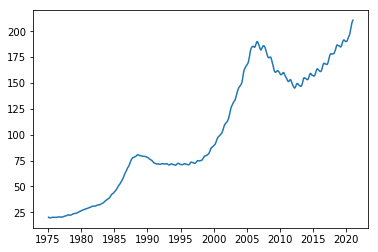

In [13]:
# plot trend of HPI
plt.plot(ts_ny)

In [14]:
def test_stationarity(timeseries): # this can be used for all MSA
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = sts.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

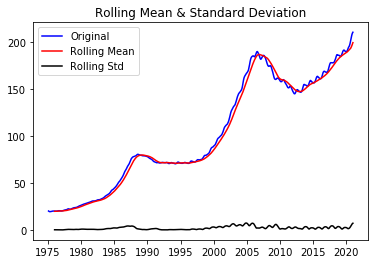

Results of Dickey-Fuller Test:
Test Statistic                   0.263971
p-value                          0.975630
#Lags Used                      19.000000
Number of Observations Used    532.000000
Critical Value (1%)             -3.442702
Critical Value (5%)             -2.866988
Critical Value (10%)            -2.569672
dtype: float64


In [15]:
test_stationarity(ts_ny) #not stationary because tstat > that critical values and pvalue > 5%

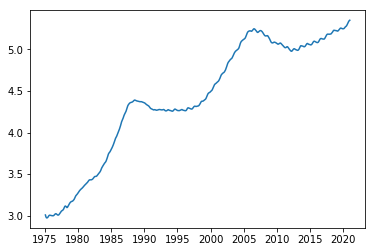

In [16]:
#take log of time series to reduce trend
ts_ny_log = np.log(ts_ny)
plt.plot(ts_ny_log)

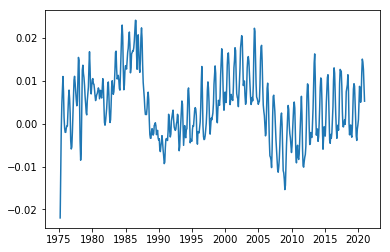

In [17]:
#take difference of logged time series to make stationary
ts_ny_log_diff = ts_ny_log - ts_ny_log.shift()
plt.plot(ts_ny_log_diff)

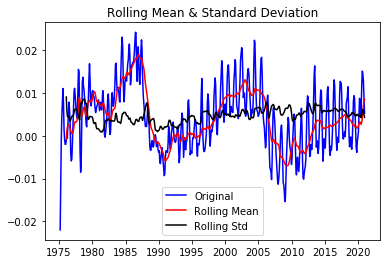

Results of Dickey-Fuller Test:
Test Statistic                  -3.021260
p-value                          0.032956
#Lags Used                      18.000000
Number of Observations Used    532.000000
Critical Value (1%)             -3.442702
Critical Value (5%)             -2.866988
Critical Value (10%)            -2.569672
dtype: float64


In [18]:
# this shows that the ts_log_diff is stationary because tstat < critical values at 5%, and pvalue is < 5%
ts_ny_log_diff.dropna(inplace=True)
test_stationarity(ts_ny_log_diff)

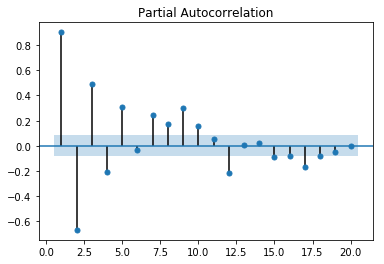

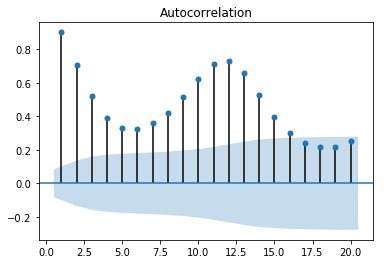

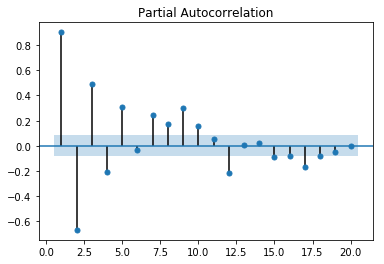

In [19]:
#use this to find ACF and PACF
sgt.plot_acf(ts_ny_log_diff, lags=20, zero=False)
sgt.plot_pacf(ts_ny_log_diff, lags=20, method='ols', zero=False)

Text(0.5, 1.0, 'RSS: 0.0022')

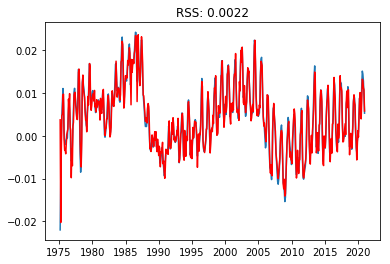

In [20]:
model513_ny = ARIMA(ts_ny_log, order=(5,1,3))
results513_ny = model513_ny.fit()
plt.plot(ts_ny_log_diff)
plt.plot(results513_ny.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results513_ny.fittedvalues-ts_ny_log_diff)**2))

In [22]:
results513_ny.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.HPI   No. Observations:                  551
Model:                 ARIMA(5, 1, 3)   Log Likelihood                2743.429
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sun, 13 Jun 2021   AIC                          -5466.859
Time:                        20:46:41   BIC                          -5423.741
Sample:                    02-28-1975   HQIC                         -5450.011
                         - 12-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0037      0.003      1.471      0.141      -0.001       0.009
ar.L1.D.HPI     2.9682      0.063     47.213      0.000       2.845       3.091
ar.L2.D.HPI    -3.7402      0.206    -18.196      0.000      -4.143      -3.337
ar.L3.D.HPI     2.6020      0.284      9.175      0.000       2.046       3.158
ar.L4.D.HPI    -1.1513      0.199     -5.773      0.000      -1.542      -0.760
ar.L5.D.HPI     0.3136      0.061      5.176      0.000       0.195       0.432
ma.L1.D.HPI    -1.0364      0.056    -18.537      0.000      -1.146      -0.927
ma.L2.D.HPI    -0.2779      0.099     -2.797      0.005      -0.473      -0.083
ma.L3.D.HPI     0.6084      0.050     12.179      0.000       0.510       0.706
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0291           -0.0000j            1.0291           -0.0000
AR.2            0.8814           -0.5084j            1.0175           -0.0833
AR.3            0.8814           +0.5084j            1.0175            0.0833
AR.4            0.4396           -1.6732j            1.7300           -0.2091
AR.5            0.4396           +1.6732j            1.7300            0.2091
MA.1           -1.4675           -0.0000j            1.4675           -0.5000
MA.2            0.9621           -0.4410j            1.0583           -0.0684
MA.3            0.9621           +0.4410j            1.0583            0.0684
-----------------------------------------------------------------------------
"""

In [23]:
# bringing things back to the original scale
predictions_ARIMA_diff_ny = pd.Series(results513_ny.fittedvalues, copy=True)
print(predictions_ARIMA_diff_ny.head())

Year
1975-02-28    0.003731
1975-03-31   -0.020240
1975-04-30   -0.003971
1975-05-31    0.004773
1975-06-30    0.004994
dtype: float64


In [24]:
predictions_ARIMA_diff_cumsum_ny = predictions_ARIMA_diff_ny.cumsum()
print(predictions_ARIMA_diff_cumsum_ny.head())

Year
1975-02-28    0.003731
1975-03-31   -0.016510
1975-04-30   -0.020480
1975-05-31   -0.015707
1975-06-30   -0.010713
dtype: float64


In [25]:
predictions_ARIMA_log_ny = pd.Series(ts_ny_log.ix[0],index=ts_ny_log.index)
predictions_ARIMA_log_ny = predictions_ARIMA_log_ny.add(predictions_ARIMA_diff_cumsum_ny, fill_value=0)
predictions_ARIMA_log_ny.head()

Year
1975-01-31    3.008155
1975-02-28    3.011885
1975-03-31    2.991645
1975-04-30    2.987674
1975-05-31    2.992448
dtype: float64

In [26]:
predictions_ARIMA_log_ny.tail()

Year
2020-08-31    5.300406
2020-09-30    5.313311
2020-10-31    5.324548
2020-11-30    5.335296
2020-12-31    5.341077
dtype: float64

Text(0.5, 1.0, 'RMSE: 1.1671')

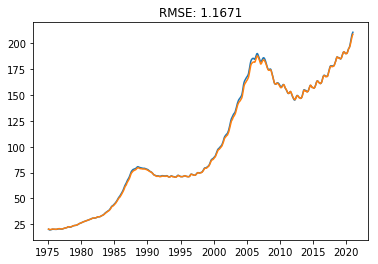

In [27]:
predictions_ARIMA_ny = np.exp(predictions_ARIMA_log_ny)
plt.plot(ts_ny)
plt.plot(predictions_ARIMA_ny)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_ny-ts_ny)**2)/len(ts_ny)))

In [28]:
predictions_ARIMA_ny.head()

Year
1975-01-31    20.250000
1975-02-28    20.325685
1975-03-31    19.918424
1975-04-30    19.839492
1975-05-31    19.934413
dtype: float64

In [29]:
xd_ny = results513_ny.forecast(steps=18)[0]
xd_ny

array([5.35457087, 5.36055487, 5.36931013, 5.38077192, 5.39443121,
       5.40935201, 5.42419998, 5.43758435, 5.44849823, 5.45660078,
       5.46227014, 5.46646635, 5.47046082, 5.47549714, 5.48246683,
       5.49168647, 5.5028342 , 5.51505746])

In [30]:
xd_ny = pd.Series(xd_ny)

In [31]:
xd_ny = pd.DataFrame(xd_ny)

In [32]:
xd_ny['Year'] = pd.date_range(start='1/2021', periods=18, freq='M')
xd_ny.rename(columns={0:'HPI'},inplace=True)
xd_ny.set_index('Year', inplace=True)
xd_ny

,HPI
Year,
2021-01-31,5.354571
2021-02-28,5.360555
2021-03-31,5.369310
2021-04-30,5.380772
2021-05-31,5.394431
2021-06-30,5.409352
2021-07-31,5.424200
2021-08-31,5.437584
2021-09-30,5.448498


In [33]:
fcast_ny = np.exp(xd_ny)
fcast_ny

,HPI
Year,
2021-01-31,211.573166
2021-02-28,212.843014
2021-03-31,214.714691
2021-04-30,217.189865
2021-05-31,220.176876
2021-06-30,223.486724
2021-07-31,226.829806
2021-08-31,229.886187
2021-09-30,232.408879


In [34]:
df_ny.tail()

,MSA,HPI
Year,,
2020-08-31,"New York-Newark-Jersey City, NY-NJ-PA",202.07
2020-09-30,"New York-Newark-Jersey City, NY-NJ-PA",205.01
2020-10-31,"New York-Newark-Jersey City, NY-NJ-PA",207.64
2020-11-30,"New York-Newark-Jersey City, NY-NJ-PA",209.57
2020-12-31,"New York-Newark-Jersey City, NY-NJ-PA",210.68


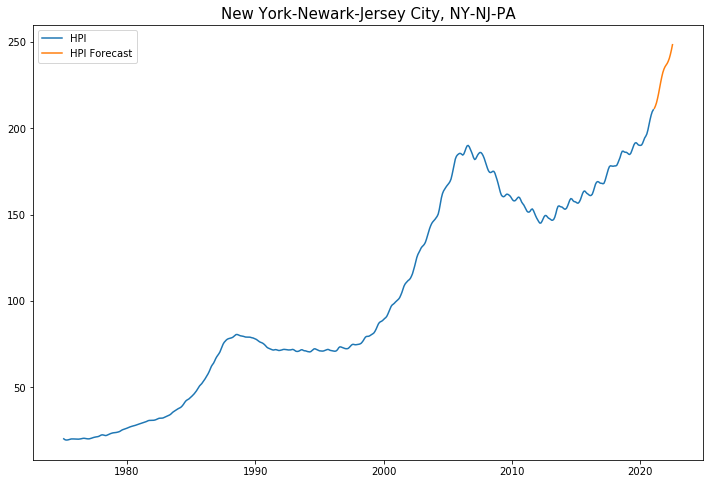

In [131]:
plt.figure(figsize=(12,8))
plt.plot(ts_ny)
plt.plot(fcast_ny)
plt.legend(['HPI', 'HPI Forecast'])
plt.title('New York-Newark-Jersey City, NY-NJ-PA', size=15)
plt.savefig('images/ny_fcast.png', dpi=300, bbox_inches='tight')
plt.show()

______________________________________________

## Los Angeles

In [36]:
ts_la = df_la['HPI']
ts_la.head()

Year
1975-01-31    15.76
1975-02-28    15.89
1975-03-31    16.16
1975-04-30    16.54
1975-05-31    16.86
Name: HPI, dtype: float64

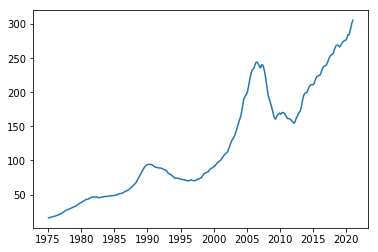

In [37]:
plt.plot(ts_la)

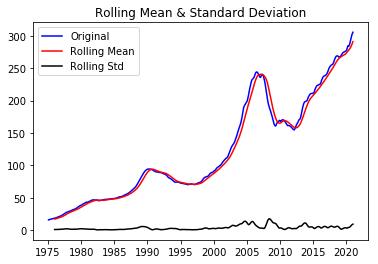

Results of Dickey-Fuller Test:
Test Statistic                   0.218703
p-value                          0.973291
#Lags Used                      19.000000
Number of Observations Used    532.000000
Critical Value (1%)             -3.442702
Critical Value (5%)             -2.866988
Critical Value (10%)            -2.569672
dtype: float64


In [38]:
test_stationarity(ts_la) #not stationary because tstat > that critical values and pvalue > 5%

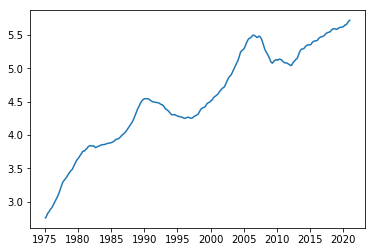

In [39]:
#take log of time series to reduce trend
ts_la_log = np.log(ts_la)
plt.plot(ts_la_log)

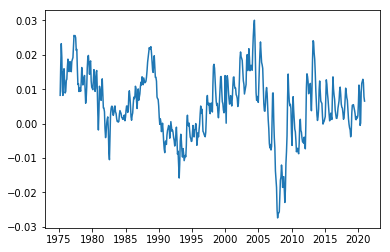

In [40]:
#take difference of logged time series to make stationary
ts_la_log_diff = ts_la_log - ts_la_log.shift()
plt.plot(ts_la_log_diff)

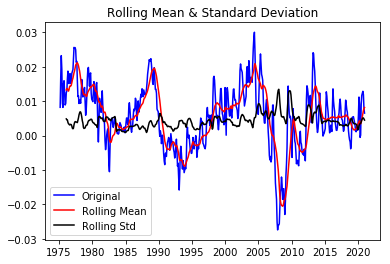

Results of Dickey-Fuller Test:
Test Statistic                  -3.175414
p-value                          0.021453
#Lags Used                      18.000000
Number of Observations Used    532.000000
Critical Value (1%)             -3.442702
Critical Value (5%)             -2.866988
Critical Value (10%)            -2.569672
dtype: float64


In [41]:
# this shows that the ts2_log_diff is stationary because tstat < critical values at 5%, and pvalue is < 5%
ts_la_log_diff.dropna(inplace=True)
test_stationarity(ts_la_log_diff)

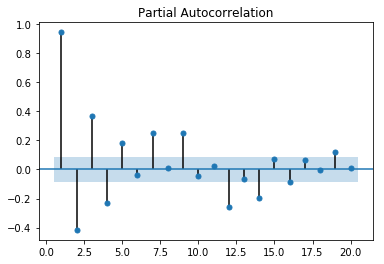

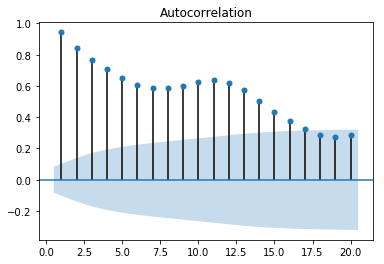

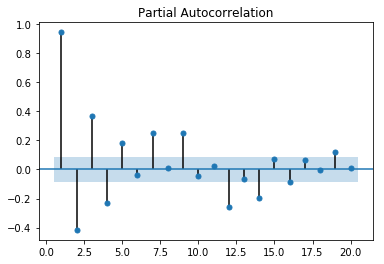

In [42]:
#use this to find ACF and PACF
sgt.plot_acf(ts_la_log_diff, lags=20, zero=False)
sgt.plot_pacf(ts_la_log_diff, lags=20, method='ols', zero=False)

Text(0.5, 1.0, 'RSS: 0.0027')

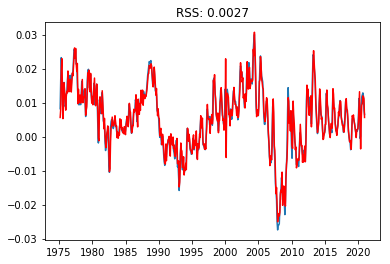

In [43]:
model513_la = ARIMA(ts_la_log, order=(5,1,3))
results513_la = model513_la.fit()
plt.plot(ts_la_log_diff)
plt.plot(results513_la.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results513_la.fittedvalues-ts_la_log_diff)**2))

In [44]:
results513_la.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.HPI   No. Observations:                  551
Model:                 ARIMA(5, 1, 3)   Log Likelihood                2594.569
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sun, 13 Jun 2021   AIC                          -5169.138
Time:                        20:47:48   BIC                          -5126.021
Sample:                    02-28-1975   HQIC                         -5152.290
                         - 12-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0056      0.002      2.620      0.009       0.001       0.010
ar.L1.D.HPI     2.4168      0.042     57.780      0.000       2.335       2.499
ar.L2.D.HPI    -2.1215      0.105    -20.257      0.000      -2.327      -1.916
ar.L3.D.HPI     0.7470      0.131      5.680      0.000       0.489       1.005
ar.L4.D.HPI    -0.2331      0.111     -2.104      0.035      -0.450      -0.016
ar.L5.D.HPI     0.1703      0.043      3.916      0.000       0.085       0.256
ma.L1.D.HPI    -0.7298      0.018    -41.367      0.000      -0.764      -0.695
ma.L2.D.HPI    -0.7233      0.017    -41.693      0.000      -0.757      -0.689
ma.L3.D.HPI     0.9469      0.014     67.615      0.000       0.919       0.974
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8687           -0.5007j            1.0027           -0.0832
AR.2            0.8687           +0.5007j            1.0027            0.0832
AR.3            1.0565           -0.0000j            1.0565           -0.0000
AR.4           -0.7128           -2.2404j            2.3510           -0.2990
AR.5           -0.7128           +2.2404j            2.3510            0.2990
MA.1           -1.0165           -0.0000j            1.0165           -0.5000
MA.2            0.8902           -0.4965j            1.0193           -0.0810
MA.3            0.8902           +0.4965j            1.0193            0.0810
-----------------------------------------------------------------------------
"""

In [45]:
# bringing things back to the original scale
predictions_ARIMA_diff_la = pd.Series(results513_la.fittedvalues, copy=True)
print(predictions_ARIMA_diff_la.head())

Year
1975-02-28    0.005645
1975-03-31    0.008063
1975-04-30    0.019491
1975-05-31    0.022953
1975-06-30    0.015348
dtype: float64


In [46]:
predictions_ARIMA_diff_cumsum_la = predictions_ARIMA_diff_la.cumsum()
print(predictions_ARIMA_diff_cumsum_la.head())

Year
1975-02-28    0.005645
1975-03-31    0.013708
1975-04-30    0.033199
1975-05-31    0.056151
1975-06-30    0.071500
dtype: float64


In [47]:
predictions_ARIMA_log_la = pd.Series(ts_la_log.ix[0],index=ts_la_log.index)
predictions_ARIMA_log_la = predictions_ARIMA_log_la.add(predictions_ARIMA_diff_cumsum_la, fill_value=0)
predictions_ARIMA_log_la.head()

Year
1975-01-31    2.757475
1975-02-28    2.763120
1975-03-31    2.771183
1975-04-30    2.790674
1975-05-31    2.813627
dtype: float64

In [48]:
predictions_ARIMA_log_la.tail()

Year
2020-08-31    5.680455
2020-09-30    5.692445
2020-10-31    5.704158
2020-11-30    5.715283
2020-12-31    5.720926
dtype: float64

Text(0.5, 1.0, 'RMSE: 2.2163')

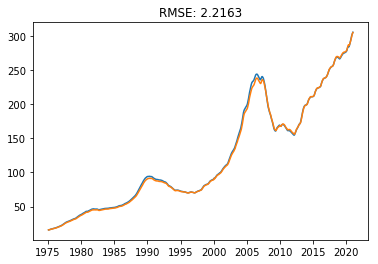

In [49]:
predictions_ARIMA_la = np.exp(predictions_ARIMA_log_la)
plt.plot(ts_la)
plt.plot(predictions_ARIMA_la)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_la-ts_la)**2)/len(ts_la)))

In [50]:
predictions_ARIMA_la.head()

Year
1975-01-31    15.760000
1975-02-28    15.849211
1975-03-31    15.977525
1975-04-30    16.291991
1975-05-31    16.670265
dtype: float64

In [51]:
xd_la = results513_la.forecast(steps=18)[0]
xd_la

array([5.73171098, 5.74175641, 5.75247882, 5.76390342, 5.77534527,
       5.7861174 , 5.7957388 , 5.80396446, 5.81087364, 5.81686173,
       5.82252822, 5.8285175 , 5.83535019, 5.84328657, 5.85226018,
       5.861899  , 5.87162782, 5.88082413])

In [52]:
xd_la = pd.Series(xd_la)

In [53]:
xd_la = pd.DataFrame(xd_la)

In [54]:
xd_la['Year'] = pd.date_range(start='1/2021', periods=18, freq='M')
xd_la.rename(columns={0:'HPI'},inplace=True)
xd_la.set_index('Year', inplace=True)
xd_la

,HPI
Year,
2021-01-31,5.731711
2021-02-28,5.741756
2021-03-31,5.752479
2021-04-30,5.763903
2021-05-31,5.775345
2021-06-30,5.786117
2021-07-31,5.795739
2021-08-31,5.803964
2021-09-30,5.810874


In [55]:
fcast_la = np.exp(xd_la)
fcast_la

,HPI
Year,
2021-01-31,308.496650
2021-02-28,311.611248
2021-03-31,314.970449
2021-04-30,318.589494
2021-05-31,322.255679
2021-06-30,325.745826
2021-07-31,328.895080
2021-08-31,331.611617
2021-09-30,333.910715


In [56]:
df_la.tail()

,MSA,HPI
Year,,
2020-08-31,"Los Angeles-Long Beach-Anaheim, CA",293.94
2020-09-30,"Los Angeles-Long Beach-Anaheim, CA",297.75
2020-10-31,"Los Angeles-Long Beach-Anaheim, CA",301.31
2020-11-30,"Los Angeles-Long Beach-Anaheim, CA",303.67
2020-12-31,"Los Angeles-Long Beach-Anaheim, CA",305.66


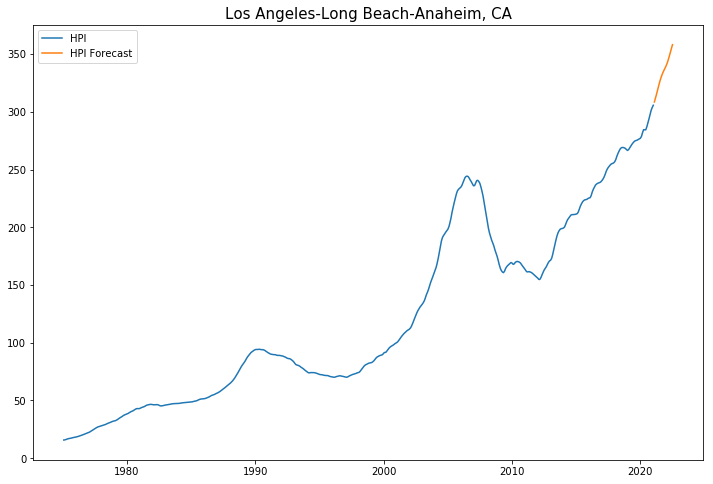

In [130]:
plt.figure(figsize=(12,8))
plt.plot(ts_la)
plt.plot(fcast_la)
plt.legend(['HPI', 'HPI Forecast'])
plt.title('Los Angeles-Long Beach-Anaheim, CA', size=15)
plt.savefig('images/la_fcast.png', dpi=300, bbox_inches='tight')
plt.show()

---

## Chicago

In [58]:
ts_chi = df_chi['HPI']
ts_chi.head()

Year
1975-01-31    23.10
1975-02-28    23.13
1975-03-31    23.28
1975-04-30    23.49
1975-05-31    23.59
Name: HPI, dtype: float64

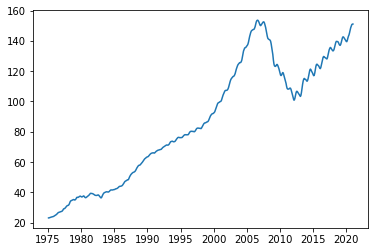

In [59]:
plt.plot(ts_chi)

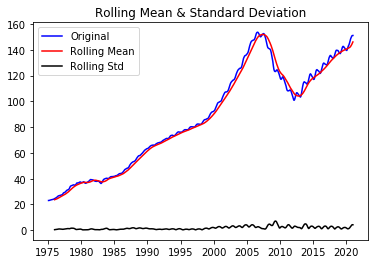

Results of Dickey-Fuller Test:
Test Statistic                  -0.353237
p-value                          0.917619
#Lags Used                      16.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64


In [60]:
test_stationarity(ts_chi) #not stationary because tstat > that critical values and pvalue > 5%

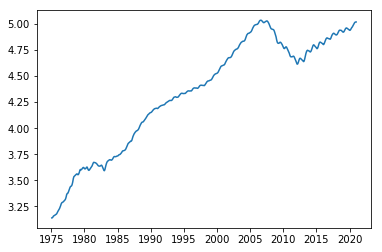

In [61]:
#take log of time series to reduce trend
ts_chi_log = np.log(ts_chi)
plt.plot(ts_chi_log)

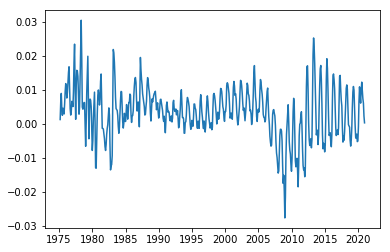

In [62]:
#take difference of logged time series to make stationary
ts_chi_log_diff = ts_chi_log - ts_chi_log.shift()
plt.plot(ts_chi_log_diff)

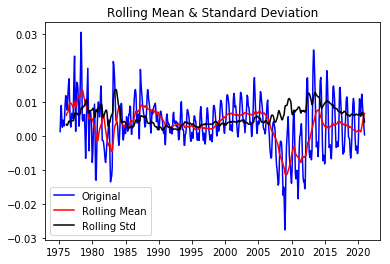

Results of Dickey-Fuller Test:
Test Statistic                  -2.839653
p-value                          0.052829
#Lags Used                      13.000000
Number of Observations Used    537.000000
Critical Value (1%)             -3.442586
Critical Value (5%)             -2.866937
Critical Value (10%)            -2.569645
dtype: float64


In [63]:
ts_chi_log_diff.dropna(inplace=True)
test_stationarity(ts_chi_log_diff)

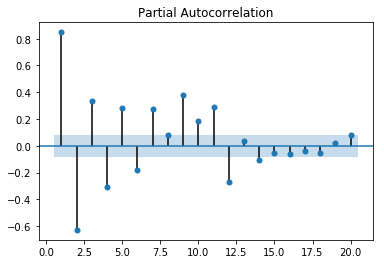

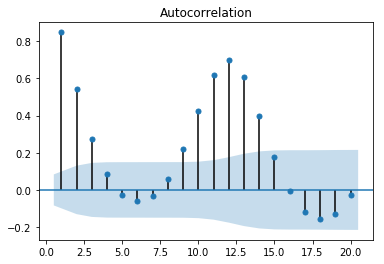

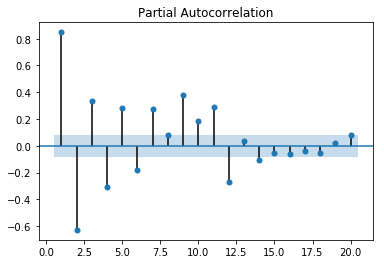

In [64]:
#use this to find ACF and PACF
sgt.plot_acf(ts_chi_log_diff, lags=20, zero=False)
sgt.plot_pacf(ts_chi_log_diff, lags=20, method='ols', zero=False)

Text(0.5, 1.0, 'RSS: 0.0027')

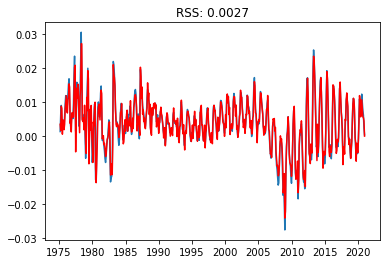

In [65]:
# create 513 model
model513_chi = ARIMA(ts_chi_log, order=(5,1,3))
results513_chi = model513_chi.fit()
plt.plot(ts_chi_log_diff)
plt.plot(results513_chi.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results513_chi.fittedvalues-ts_chi_log_diff)**2))

In [66]:
results513_chi.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.HPI   No. Observations:                  551
Model:                 ARIMA(5, 1, 3)   Log Likelihood                2591.460
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sun, 13 Jun 2021   AIC                          -5162.920
Time:                        20:49:21   BIC                          -5119.802
Sample:                    02-28-1975   HQIC                         -5146.071
                         - 12-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0034      0.001      4.141      0.000       0.002       0.005
ar.L1.D.HPI     2.6156      0.044     60.076      0.000       2.530       2.701
ar.L2.D.HPI    -2.8640      0.121    -23.667      0.000      -3.101      -2.627
ar.L3.D.HPI     1.7260      0.160     10.780      0.000       1.412       2.040
ar.L4.D.HPI    -0.7859      0.122     -6.455      0.000      -1.024      -0.547
ar.L5.D.HPI     0.2590      0.044      5.919      0.000       0.173       0.345
ma.L1.D.HPI    -0.7853      0.024    -32.531      0.000      -0.833      -0.738
ma.L2.D.HPI    -0.6520      0.037    -17.736      0.000      -0.724      -0.580
ma.L3.D.HPI     0.8823      0.026     33.783      0.000       0.831       0.933
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8712           -0.5007j            1.0049           -0.0830
AR.2            0.8712           +0.5007j            1.0049            0.0830
AR.3            1.1720           -0.0000j            1.1720           -0.0000
AR.4            0.0600           -1.8053j            1.8063           -0.2447
AR.5            0.0600           +1.8053j            1.8063            0.2447
MA.1           -1.0735           -0.0000j            1.0735           -0.5000
MA.2            0.9063           -0.4842j            1.0275           -0.0781
MA.3            0.9063           +0.4842j            1.0275            0.0781
-----------------------------------------------------------------------------
"""

In [67]:
# bringing things back to the original scale
predictions_ARIMA_diff_chi = pd.Series(results513_chi.fittedvalues, copy=True)
print(predictions_ARIMA_diff_chi.head())

Year
1975-02-28    0.003433
1975-03-31    0.001619
1975-04-30    0.008739
1975-05-31    0.008119
1975-06-30    0.000529
dtype: float64


In [68]:
predictions_ARIMA_diff_cumsum_chi = predictions_ARIMA_diff_chi.cumsum()
print(predictions_ARIMA_diff_cumsum_chi.head())

Year
1975-02-28    0.003433
1975-03-31    0.005052
1975-04-30    0.013791
1975-05-31    0.021910
1975-06-30    0.022439
dtype: float64


In [69]:
predictions_ARIMA_log_chi = pd.Series(ts_chi_log.ix[0],index=ts_chi_log.index)
predictions_ARIMA_log_chi = predictions_ARIMA_log_chi.add(predictions_ARIMA_diff_cumsum_chi, fill_value=0)
predictions_ARIMA_log_chi.head()

Year
1975-01-31    3.139833
1975-02-28    3.143265
1975-03-31    3.144885
1975-04-30    3.153624
1975-05-31    3.161743
dtype: float64

In [70]:
predictions_ARIMA_log_chi.tail()

Year
2020-08-31    5.000055
2020-09-30    5.005634
2020-10-31    5.011040
2020-11-30    5.015446
2020-12-31    5.015401
dtype: float64

Text(0.5, 1.0, 'RMSE: 3.5898')

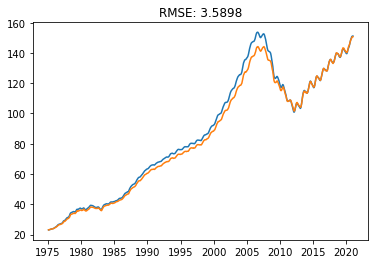

In [71]:
predictions_ARIMA_chi = np.exp(predictions_ARIMA_log_chi)
plt.plot(ts_chi)
plt.plot(predictions_ARIMA_chi)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_chi-ts_chi)**2)/len(ts_chi)))

In [72]:
predictions_ARIMA_chi.head()

Year
1975-01-31    23.100000
1975-02-28    23.179428
1975-03-31    23.216994
1975-04-30    23.420784
1975-05-31    23.611714
dtype: float64

In [73]:
xd_chi = results513_chi.forecast(steps=18)[0]
xd_chi

array([5.02165306, 5.028592  , 5.03808417, 5.04926872, 5.06096416,
       5.0714797 , 5.0792991 , 5.08365879, 5.08469137, 5.0833364 ,
       5.08110735, 5.07970821, 5.08058104, 5.08452552, 5.09149828,
       5.10063724, 5.11050013, 5.1194536 ])

In [74]:
xd_chi = pd.Series(xd_chi)

In [75]:
xd_chi = pd.DataFrame(xd_chi)

In [76]:
xd_chi['Year'] = pd.date_range(start='1/2021', periods=18, freq='M')
xd_chi.rename(columns={0:'HPI'},inplace=True)
xd_chi.set_index('Year', inplace=True)

In [77]:
fcast_chi = np.exp(xd_chi)
fcast_chi

,HPI
Year,
2021-01-31,151.661803
2021-02-28,152.717835
2021-03-31,154.174360
2021-04-30,155.908410
2021-05-31,157.742532
2021-06-30,159.410032
2021-07-31,160.661408
2021-08-31,161.363371
2021-09-30,161.530079


In [78]:
df_chi.tail()

,MSA,HPI
Year,,
2020-08-31,"Chicago-Naperville-Elgin, IL-IN-WI",148.72
2020-09-30,"Chicago-Naperville-Elgin, IL-IN-WI",149.84
2020-10-31,"Chicago-Naperville-Elgin, IL-IN-WI",150.76
2020-11-30,"Chicago-Naperville-Elgin, IL-IN-WI",151.11
2020-12-31,"Chicago-Naperville-Elgin, IL-IN-WI",151.16


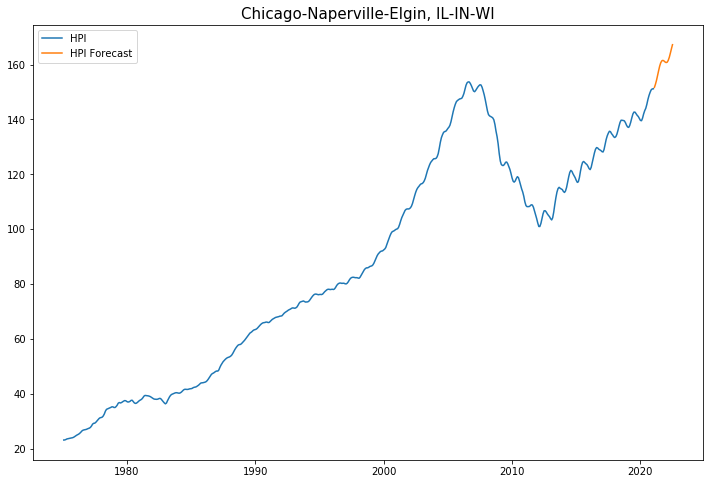

In [129]:
plt.figure(figsize=(12,8))
plt.plot(ts_chi)
plt.plot(fcast_chi)
plt.legend(['HPI', 'HPI Forecast'])
plt.title('Chicago-Naperville-Elgin, IL-IN-WI', size=15)
plt.savefig('images/chi_fcast.png', dpi=300, bbox_inches='tight')
plt.show()

---

## DFW

In [80]:
ts_dfw = df_dfw['HPI']
ts_dfw.head()

Year
1975-01-31    31.87
1975-02-28    31.92
1975-03-31    32.28
1975-04-30    32.96
1975-05-31    33.07
Name: HPI, dtype: float64

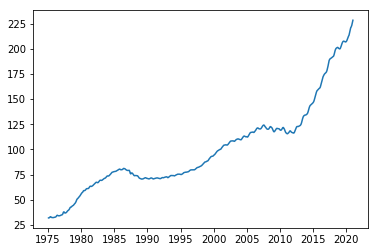

In [81]:
plt.plot(ts_dfw)

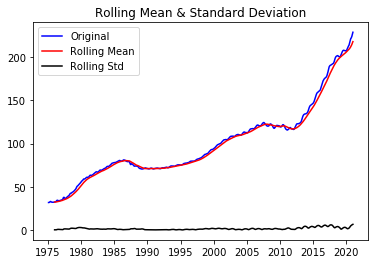

Results of Dickey-Fuller Test:
Test Statistic                   2.933582
p-value                          1.000000
#Lags Used                      19.000000
Number of Observations Used    532.000000
Critical Value (1%)             -3.442702
Critical Value (5%)             -2.866988
Critical Value (10%)            -2.569672
dtype: float64


In [82]:
test_stationarity(ts_dfw) #not stationary because tstat > that critical values and pvalue > 5%

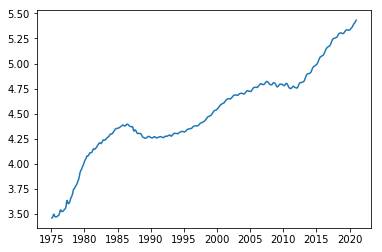

In [83]:
#take log of time series to reduce trend
ts_dfw_log = np.log(ts_dfw)
plt.plot(ts_dfw_log)

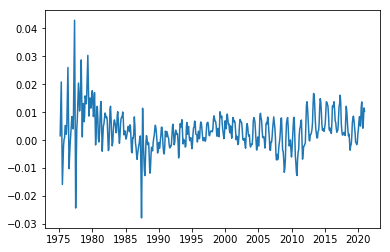

In [84]:
#take difference of logged time series to make stationary
ts_dfw_log_diff = ts_dfw_log - ts_dfw_log.shift()
plt.plot(ts_dfw_log_diff)

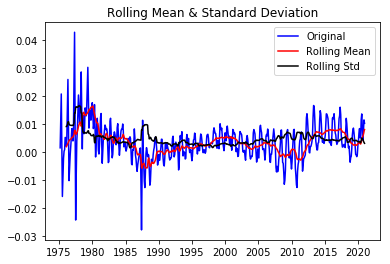

Results of Dickey-Fuller Test:
Test Statistic                  -2.998835
p-value                          0.035003
#Lags Used                      19.000000
Number of Observations Used    531.000000
Critical Value (1%)             -3.442725
Critical Value (5%)             -2.866998
Critical Value (10%)            -2.569677
dtype: float64


In [85]:
# this shows that the data is stationary because tstat < critical values at 5%, and pvalue is < 5%
ts_dfw_log_diff.dropna(inplace=True)
test_stationarity(ts_dfw_log_diff)

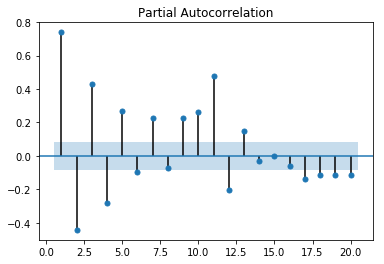

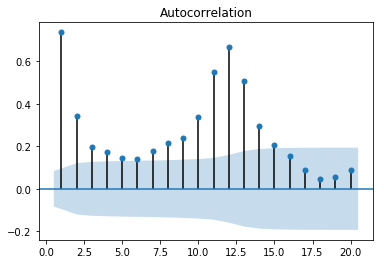

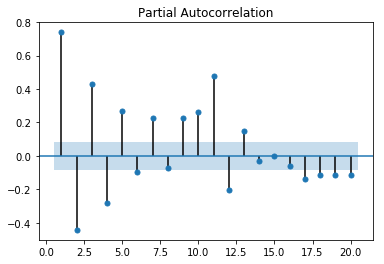

In [86]:
#use this to find ACF and PACF
sgt.plot_acf(ts_dfw_log_diff, lags=20, zero=False)
sgt.plot_pacf(ts_dfw_log_diff, lags=20, method='ols', zero=False)

Text(0.5, 1.0, 'RSS: 0.0050')

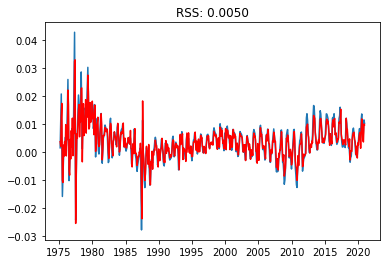

In [87]:
# create 513 model
model513_dfw = ARIMA(ts_dfw_log, order=(5,1,3))
results513_dfw = model513_dfw.fit()
plt.plot(ts_dfw_log_diff)
plt.plot(results513_dfw.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results513_dfw.fittedvalues-ts_dfw_log_diff)**2))

In [88]:
results513_dfw.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.HPI   No. Observations:                  551
Model:                 ARIMA(5, 1, 3)   Log Likelihood                2421.504
Method:                       css-mle   S.D. of innovations              0.003
Date:                Sun, 13 Jun 2021   AIC                          -4823.009
Time:                        20:51:20   BIC                          -4779.892
Sample:                    02-28-1975   HQIC                         -4806.161
                         - 12-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0038      0.001      2.603      0.009       0.001       0.007
ar.L1.D.HPI     0.6214      0.062      9.947      0.000       0.499       0.744
ar.L2.D.HPI     0.5262      0.082      6.388      0.000       0.365       0.688
ar.L3.D.HPI    -0.3648      0.070     -5.228      0.000      -0.502      -0.228
ar.L4.D.HPI     0.1838      0.065      2.841      0.004       0.057       0.311
ar.L5.D.HPI     0.0058      0.050      0.115      0.909      -0.093       0.105
ma.L1.D.HPI     0.9739      0.046     21.198      0.000       0.884       1.064
ma.L2.D.HPI    -0.8185      0.043    -18.828      0.000      -0.904      -0.733
ma.L3.D.HPI    -0.8195      0.041    -20.092      0.000      -0.899      -0.740
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0204           -0.0000j            1.0204           -0.0000
AR.2           -1.1973           -0.0000j            1.1973           -0.5000
AR.3            1.0620           -1.7516j            2.0484           -0.1633
AR.4            1.0620           +1.7516j            2.0484            0.1633
AR.5          -33.7464           -0.0000j           33.7464           -0.5000
MA.1            1.0974           -0.0000j            1.0974           -0.0000
MA.2           -1.0481           -0.1160j            1.0545           -0.4825
MA.3           -1.0481           +0.1160j            1.0545            0.4825
-----------------------------------------------------------------------------
"""

In [89]:
# bringing things back to the original scale
predictions_ARIMA_diff_dfw = pd.Series(results513_dfw.fittedvalues, copy=True)
print(predictions_ARIMA_diff_dfw.head())

Year
1975-02-28    0.003765
1975-03-31    0.002149
1975-04-30    0.012667
1975-05-31    0.017461
1975-06-30   -0.010142
dtype: float64


In [90]:
predictions_ARIMA_diff_cumsum_dfw = predictions_ARIMA_diff_dfw.cumsum()
print(predictions_ARIMA_diff_cumsum_dfw.head())

Year
1975-02-28    0.003765
1975-03-31    0.005914
1975-04-30    0.018580
1975-05-31    0.036042
1975-06-30    0.025900
dtype: float64


In [91]:
predictions_ARIMA_log_dfw = pd.Series(ts_dfw_log.ix[0],index=ts_dfw_log.index)
predictions_ARIMA_log_dfw = predictions_ARIMA_log_dfw.add(predictions_ARIMA_diff_cumsum_dfw, fill_value=0)
predictions_ARIMA_log_dfw.head()

Year
1975-01-31    3.461665
1975-02-28    3.465430
1975-03-31    3.467579
1975-04-30    3.480246
1975-05-31    3.497707
dtype: float64

In [92]:
predictions_ARIMA_log_dfw.tail()

Year
2020-08-31    5.400989
2020-09-30    5.405283
2020-10-31    5.408954
2020-11-30    5.419063
2020-12-31    5.428828
dtype: float64

Text(0.5, 1.0, 'RMSE: 2.0311')

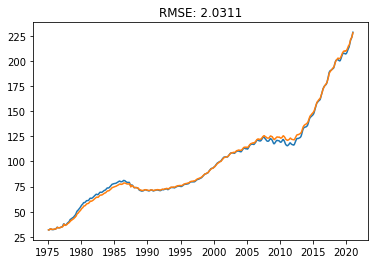

In [93]:
predictions_ARIMA_dfw = np.exp(predictions_ARIMA_log_dfw)
plt.plot(ts_dfw)
plt.plot(predictions_ARIMA_dfw)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_dfw-ts_dfw)**2)/len(ts_dfw)))

In [94]:
predictions_ARIMA_dfw.head()

Year
1975-01-31    31.870000
1975-02-28    31.990216
1975-03-31    32.059035
1975-04-30    32.467694
1975-05-31    33.039600
dtype: float64

In [95]:
xd_dfw = results513_dfw.forecast(steps=18)[0]
xd_dfw

array([5.43877859, 5.44435991, 5.44973754, 5.45539749, 5.46122734,
       5.46703899, 5.47277794, 5.47845087, 5.48408403, 5.48968189,
       5.49524751, 5.50077647, 5.50627087, 5.51172955, 5.51715509,
       5.52254692, 5.52790683, 5.53323449])

In [96]:
xd_dfw = pd.Series(xd_dfw)

In [97]:
xd_dfw = pd.DataFrame(xd_dfw)

In [98]:
xd_dfw['Year'] = pd.date_range(start='1/2021', periods=18, freq='M')
xd_dfw.rename(columns={0:'HPI'},inplace=True)
xd_dfw.set_index('Year', inplace=True)

In [99]:
fcast_dfw = np.exp(xd_dfw)
fcast_dfw

,HPI
Year,
2021-01-31,230.160891
2021-02-28,231.449084
2021-03-31,232.697084
2021-04-30,234.017872
2021-05-31,235.386146
2021-06-30,236.758111
2021-07-31,238.120760
2021-08-31,239.475441
2021-09-30,240.828251


In [101]:
df_dfw.tail()

,MSA,HPI
Year,,
2020-08-31,"Dallas-Fort Worth-Arlington, TX",220.98
2020-09-30,"Dallas-Fort Worth-Arlington, TX",221.93
2020-10-31,"Dallas-Fort Worth-Arlington, TX",223.52
2020-11-30,"Dallas-Fort Worth-Arlington, TX",226.12
2020-12-31,"Dallas-Fort Worth-Arlington, TX",228.47


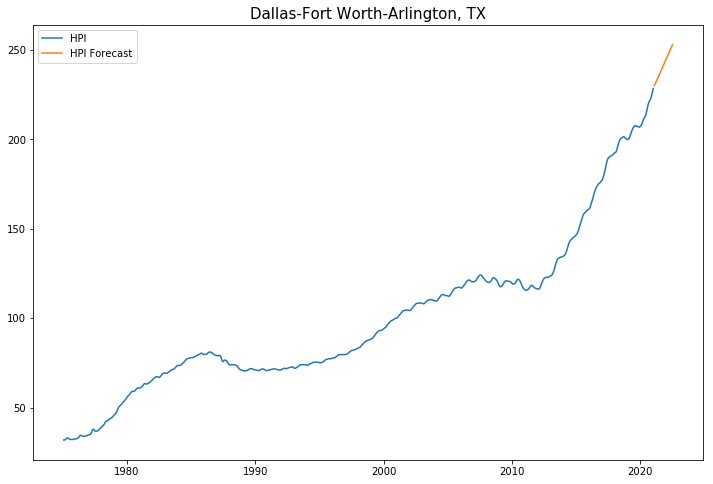

In [128]:
plt.figure(figsize=(12,8))
plt.plot(ts_dfw)
plt.plot(fcast_dfw)
plt.legend(['HPI', 'HPI Forecast'])
plt.title('Dallas-Fort Worth-Arlington, TX', size=15)
plt.savefig('images/dfw_fcast.png', dpi=300, bbox_inches='tight')
plt.show()

---

## Houston

In [103]:
ts_hou = df_hou['HPI']
ts_hou.head()

Year
1975-01-31    32.71
1975-02-28    32.98
1975-03-31    33.58
1975-04-30    34.52
1975-05-31    34.87
Name: HPI, dtype: float64

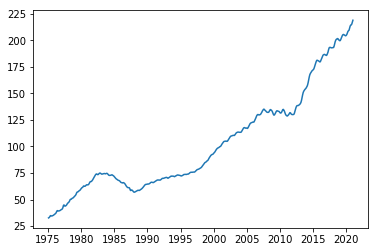

In [104]:
plt.plot(ts_hou)

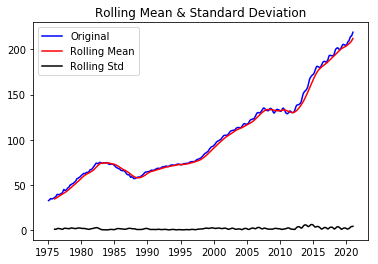

Results of Dickey-Fuller Test:
Test Statistic                   2.406489
p-value                          0.999013
#Lags Used                      19.000000
Number of Observations Used    532.000000
Critical Value (1%)             -3.442702
Critical Value (5%)             -2.866988
Critical Value (10%)            -2.569672
dtype: float64


In [105]:
test_stationarity(ts_hou) #not stationary because tstat > that critical values and pvalue > 5%

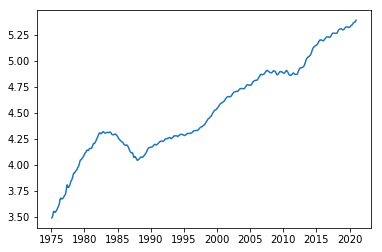

In [106]:
#take log of time series to reduce trend
ts_hou_log = np.log(ts_hou)
plt.plot(ts_hou_log)

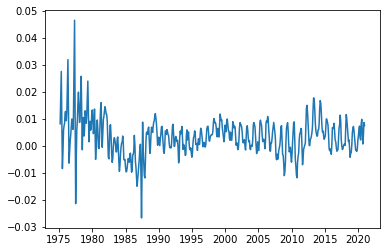

In [107]:
#take difference of logged time series to make stationary
ts_hou_log_diff = ts_hou_log - ts_hou_log.shift()
plt.plot(ts_hou_log_diff)

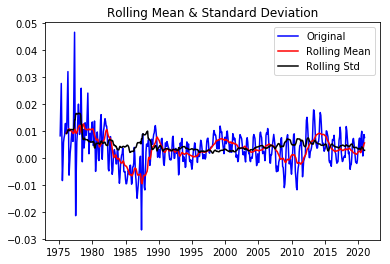

Results of Dickey-Fuller Test:
Test Statistic                  -3.581629
p-value                          0.006122
#Lags Used                      19.000000
Number of Observations Used    531.000000
Critical Value (1%)             -3.442725
Critical Value (5%)             -2.866998
Critical Value (10%)            -2.569677
dtype: float64


In [108]:
# this shows that the ts2_log_diff is stationary because tstat < critical values at 1%, and pvalue is < 5%
ts_hou_log_diff.dropna(inplace=True)
test_stationarity(ts_hou_log_diff)

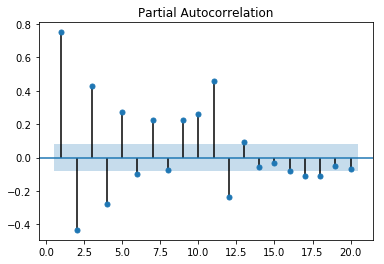

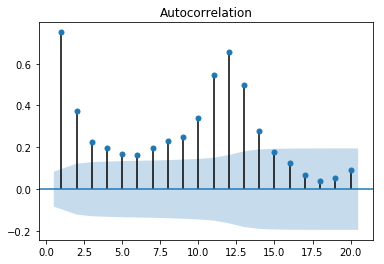

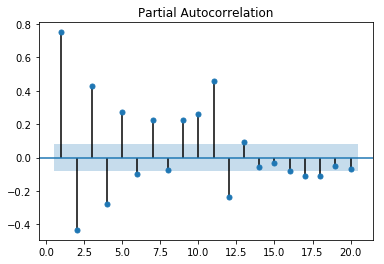

In [109]:
#use this to find ACF and PACF
sgt.plot_acf(ts_hou_log_diff, lags=20, zero=False)
sgt.plot_pacf(ts_hou_log_diff, lags=20, method='ols', zero=False)

Text(0.5, 1.0, 'RSS: 0.0046')

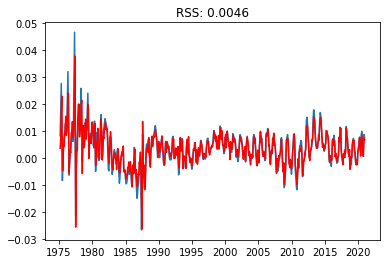

In [110]:
# create 513 model
model513_hou = ARIMA(ts_hou_log, order=(5,1,3))
results513_hou = model513_hou.fit()
plt.plot(ts_hou_log_diff)
plt.plot(results513_hou.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results513_hou.fittedvalues-ts_hou_log_diff)**2))

In [111]:
results513_hou.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.HPI   No. Observations:                  551
Model:                 ARIMA(5, 1, 3)   Log Likelihood                2451.197
Method:                       css-mle   S.D. of innovations              0.003
Date:                Sun, 13 Jun 2021   AIC                          -4882.395
Time:                        20:53:23   BIC                          -4839.277
Sample:                    02-28-1975   HQIC                         -4865.547
                         - 12-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0036      0.001      3.473      0.001       0.002       0.006
ar.L1.D.HPI     2.3706      0.045     52.569      0.000       2.282       2.459
ar.L2.D.HPI    -2.3018      0.113    -20.425      0.000      -2.523      -2.081
ar.L3.D.HPI     1.3687      0.140      9.769      0.000       1.094       1.643
ar.L4.D.HPI    -0.7740      0.114     -6.772      0.000      -0.998      -0.550
ar.L5.D.HPI     0.3101      0.046      6.699      0.000       0.219       0.401
ma.L1.D.HPI    -0.8116      0.025    -32.300      0.000      -0.861      -0.762
ma.L2.D.HPI    -0.8142      0.031    -26.602      0.000      -0.874      -0.754
ma.L3.D.HPI     0.8603      0.027     32.386      0.000       0.808       0.912
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0744           -0.0000j            1.0744           -0.0000
AR.2            0.9394           -0.5288j            1.0780           -0.0816
AR.3            0.9394           +0.5288j            1.0780            0.0816
AR.4           -0.2285           -1.5909j            1.6072           -0.2727
AR.5           -0.2285           +1.5909j            1.6072            0.2727
MA.1           -1.0388           -0.0000j            1.0388           -0.5000
MA.2            0.9927           -0.3656j            1.0578           -0.0562
MA.3            0.9927           +0.3656j            1.0578            0.0562
-----------------------------------------------------------------------------
"""

In [112]:
# bringing things back to the original scale
predictions_ARIMA_diff_hou = pd.Series(results513_hou.fittedvalues, copy=True)
print(predictions_ARIMA_diff_hou.head())

Year
1975-02-28    0.003621
1975-03-31    0.007069
1975-04-30    0.017090
1975-05-31    0.022934
1975-06-30   -0.004683
dtype: float64


In [113]:
predictions_ARIMA_diff_cumsum_hou = predictions_ARIMA_diff_hou.cumsum()
print(predictions_ARIMA_diff_cumsum_hou.head())

Year
1975-02-28    0.003621
1975-03-31    0.010691
1975-04-30    0.027781
1975-05-31    0.050715
1975-06-30    0.046031
dtype: float64


In [115]:
predictions_ARIMA_log_hou = pd.Series(ts_hou_log.ix[0],index=ts_hou_log.index)
predictions_ARIMA_log_hou = predictions_ARIMA_log_hou.add(predictions_ARIMA_diff_cumsum_hou, fill_value=0)
predictions_ARIMA_log_hou.head()

Year
1975-01-31    3.487681
1975-02-28    3.491302
1975-03-31    3.498371
1975-04-30    3.515462
1975-05-31    3.538396
dtype: float64

In [116]:
predictions_ARIMA_log_hou.tail()

Year
2020-08-31    5.373735
2020-09-30    5.375687
2020-10-31    5.376309
2020-11-30    5.383627
2020-12-31    5.390501
dtype: float64

Text(0.5, 1.0, 'RMSE: 1.7059')

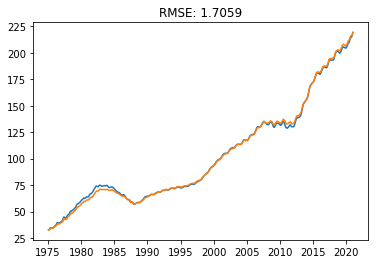

In [117]:
predictions_ARIMA_hou = np.exp(predictions_ARIMA_log_hou)
plt.plot(ts_hou)
plt.plot(predictions_ARIMA_hou)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_hou-ts_hou)**2)/len(ts_hou)))

In [118]:
predictions_ARIMA_hou.head()

Year
1975-01-31    32.710000
1975-02-28    32.828665
1975-03-31    33.061567
1975-04-30    33.631461
1975-05-31    34.411665
dtype: float64

In [119]:
xd_hou = results513_hou.forecast(steps=18)[0]
xd_hou

array([5.39445404, 5.40026538, 5.40647347, 5.41257992, 5.41872732,
       5.42512154, 5.43158016, 5.43788105, 5.44393442, 5.44967386,
       5.45504966, 5.46008927, 5.4648819 , 5.46953145, 5.47413419,
       5.4787648 , 5.48346024, 5.48821534])

In [120]:
xd_hou = pd.Series(xd_hou)

In [121]:
xd_hou = pd.DataFrame(xd_hou)

In [122]:
xd_hou['Year'] = pd.date_range(start='1/2021', periods=18, freq='M')
xd_hou.rename(columns={0:'HPI'},inplace=True)
xd_hou.set_index('Year', inplace=True)

In [123]:
fcast_hou = np.exp(xd_hou)
fcast_hou

,HPI
Year,
2021-01-31,220.181904
2021-02-28,221.465180
2021-03-31,222.844333
2021-04-30,224.209284
2021-05-31,225.591833
2021-06-30,227.038940
2021-07-31,228.510043
2021-08-31,229.954406
2021-09-30,231.350626


In [124]:
df_hou.tail()

,MSA,HPI
Year,,
2020-08-31,"Houston-The Woodlands-Sugar Land, TX",214.36
2020-09-30,"Houston-The Woodlands-Sugar Land, TX",214.52
2020-10-31,"Houston-The Woodlands-Sugar Land, TX",215.38
2020-11-30,"Houston-The Woodlands-Sugar Land, TX",217.26
2020-12-31,"Houston-The Woodlands-Sugar Land, TX",218.92


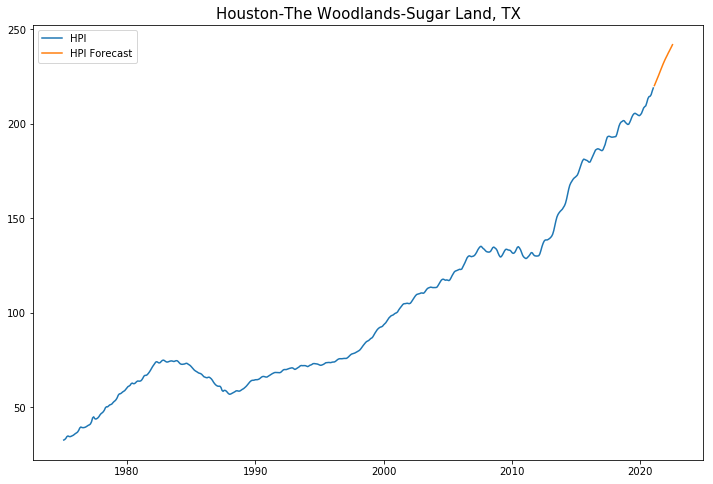

In [127]:
plt.figure(figsize=(12,8))
plt.plot(ts_hou)
plt.plot(fcast_hou)
plt.legend(['HPI', 'HPI Forecast'])
plt.title('Houston-The Woodlands-Sugar Land, TX', size=15)
plt.savefig('images/hou_fcast.png', dpi=300, bbox_inches='tight')
plt.show()